In [55]:
import re
import pandas
import matplotlib
from matplotlib import pyplot as plt
from datasets.utils import TMP_DIR

In [56]:
df = pandas.read_json('./grammy_winners.json')

In [57]:
df = df.sort_values('year')

In [58]:
df.head(n=5)

,year,subtitle,category,artist,song_or_album,url,producers,winner
7144,1958,1St Annual Grammy Awards,Song Of The Year,"Cy Coleman & Carolyn Leigh, songwriters (Frank...",Witchcraft (Single),https://www.grammy.com/awards/1st-annual-gramm...,,False
7145,1958,1St Annual Grammy Awards,Song Of The Year,"Alan J. Lerner & Frederick Loewe, songwriters ...",Gigi (Single),https://www.grammy.com/awards/1st-annual-gramm...,,False
7146,1958,1St Annual Grammy Awards,Song Of The Year,"Eddie Cooley & Johnny Davenport, songwriters (...",Fever,https://www.grammy.com/awards/1st-annual-gramm...,,False
7147,1958,1St Annual Grammy Awards,Song Of The Year,"Lee Pockriss & Paul Vance, songwriters (Perry ...",Catch A Falling Star,https://www.grammy.com/awards/1st-annual-gramm...,,False
7148,1958,1St Annual Grammy Awards,"Best Vocal Performance, Female",Ella Fitzgerald,Ella Fitzgerald Sings The Irving Berlin Song Book,https://www.grammy.com/awards/1st-annual-gramm...,,True


In [59]:
def annual_edition(value: str | None):
    if value:
        result = re.match(r'\d+', value)
        if result:
            return result.group()
    return value


df['annual_edition'] = df.subtitle.map(annual_edition)

In [87]:
df['category'].drop_duplicates().sort_index().to_csv('categories.csv')

## Data exploration

In [6]:
grouping = df.groupby('year')['year'].count()

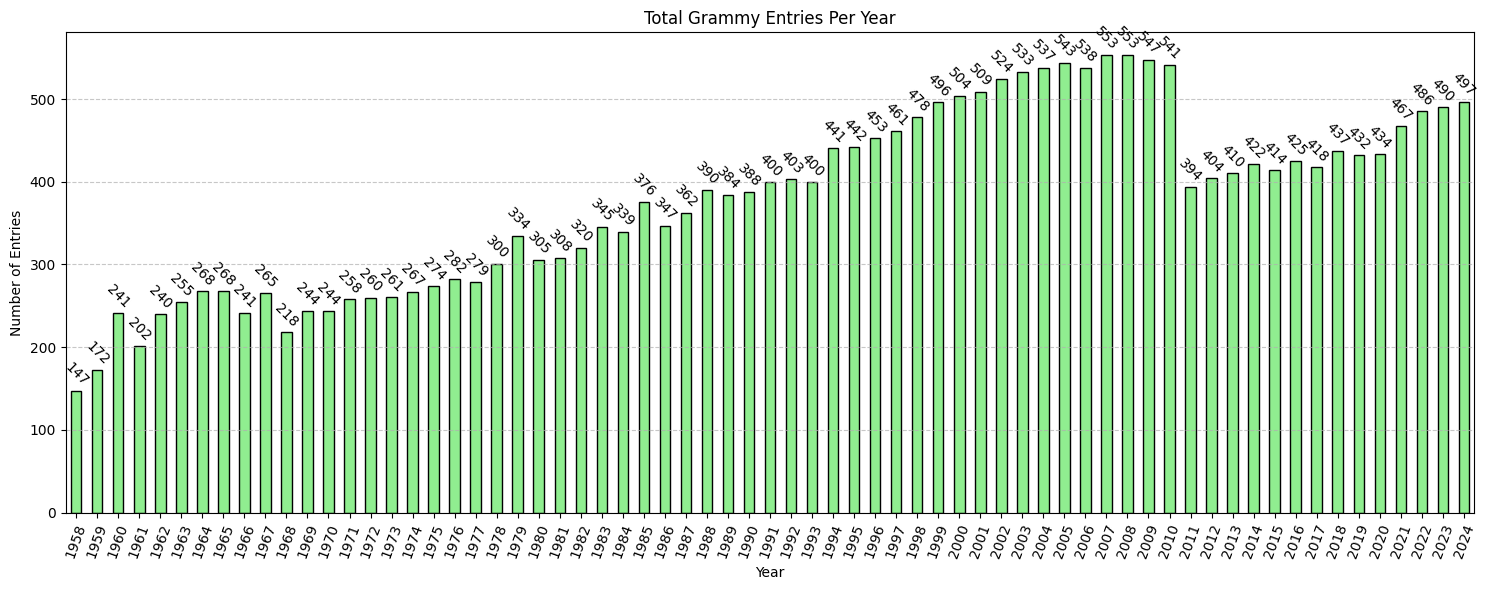

In [121]:
plt.figure(figsize=(15, 6))

ax = grouping.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Total Grammy Entries Per Year')


plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.xticks(rotation=70)
plt.grid(axis='y', linestyle='--', alpha=0.7)

params = {'ha': 'center', 'va': 'center', 'rotation': -45}

for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 20
    ax.text(x, y, f'{int(height)}', **params)

plt.tight_layout()
plt.show()

In [110]:
category_df = df.drop_duplicates(subset=['category'])
category_by_year = category_df.groupby('year')['category'].count()

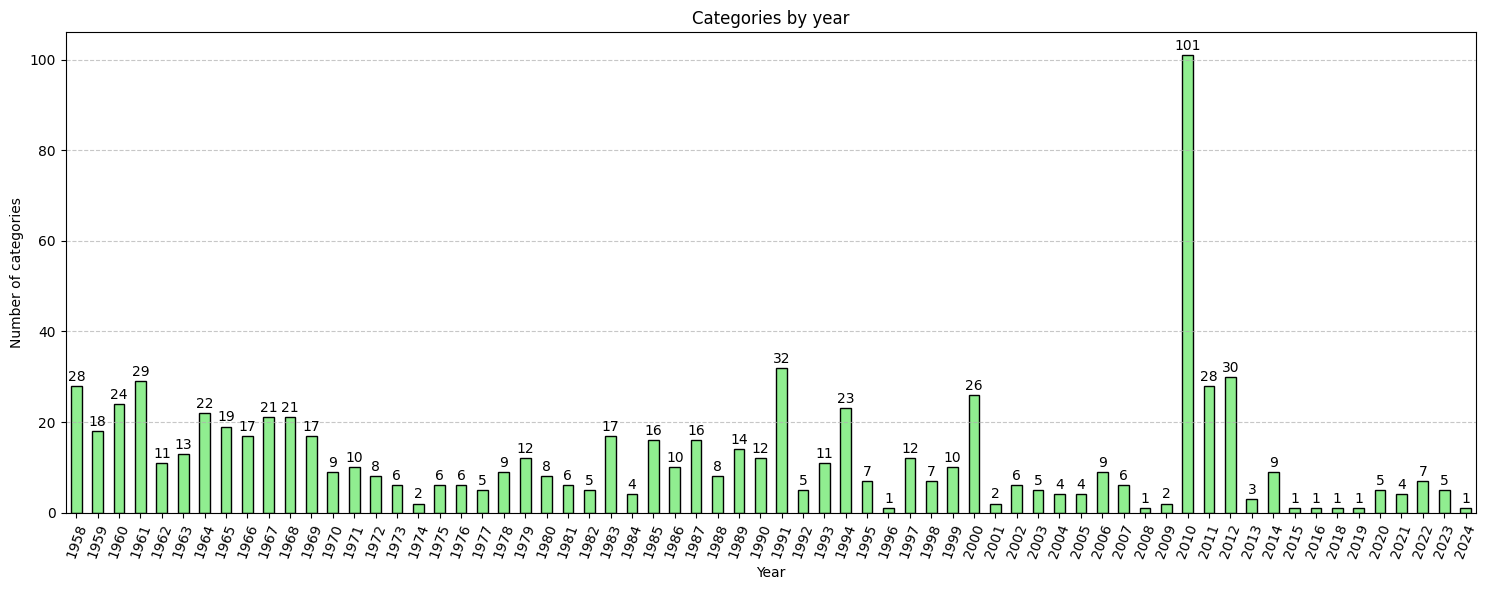

In [113]:
plt.figure(figsize=(15, 6))

ax = category_by_year.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Categories by year')

plt.xlabel('Year')
plt.ylabel('Number of categories')

plt.xticks(rotation=70)
plt.grid(axis='y', linestyle='--', alpha=0.7)

params = {'ha': 'center', 'va': 'center'}

for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = height + 2
    ax.text(x, y, f'{int(height)}', **params)

plt.tight_layout()
plt.show()

In [124]:
winners = df[df.winner == True]
winners_by_year = winners.groupby('year')['artist'].count()

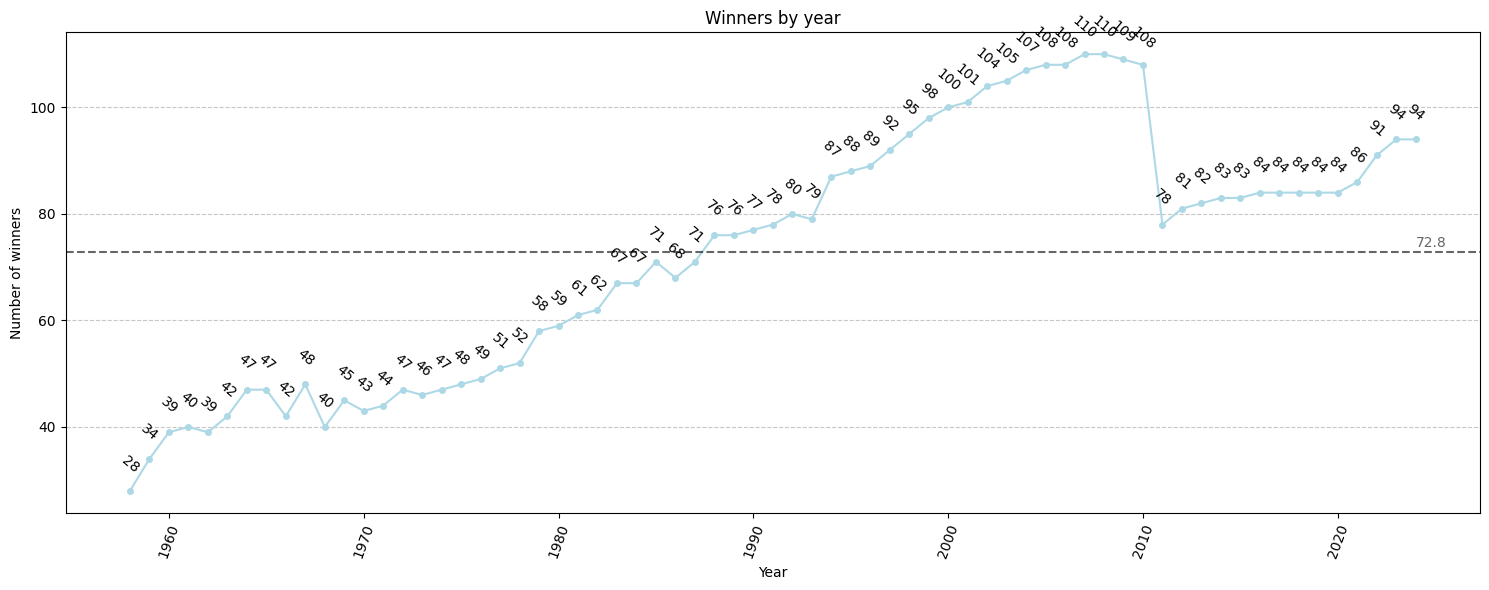

In [157]:
plt.figure(figsize=(15, 6))

ax = winners_by_year.plot(kind='line', color='lightblue', marker='o', markersize=4)

plt.title('Winners by year')

plt.xlabel('Year')
plt.ylabel('Number of winners')

plt.xticks(rotation=70)
plt.grid(axis='y', linestyle='--', alpha=0.7)

params = {'ha': 'center', 'va': 'center', 'rotation': -40}

for x, y in zip(winners_by_year.index, winners_by_year.values):
    ax.text(x, y + 5, f'{int(y)}', **params)


# Calculate average
avg_winners = winners_by_year.mean()
ax.axhline(y=avg_winners, color='black', linestyle='--', alpha=0.6, linewidth=1.5, label='Average')

x_pos = winners_by_year.index[-1]
ax.text(x_pos, avg_winners + 0.5, f'{avg_winners:.1f}', color='black', alpha=0.6, fontsize=10, ha='left', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Print data

In [15]:
df_to_print = df[['year', 'annual_edition', 'category', 'artist', 'producers', 'song_or_album', 'winner', 'url']]

In [16]:
df_to_print = df_to_print.sort_values('year', ascending=False)

In [17]:
# df_to_print = df_to_print.query('year == 2010')

In [18]:
df_to_print.to_csv(TMP_DIR / 'grammy_winners.csv', index=False)

In [124]:
empty_artists = df_to_print.loc[(df_to_print.artist != '') & (df_to_print.song_or_album != ''), ['category', 'artist', 'year', 'url']]

In [125]:
empty_artists.to_csv(TMP_DIR / 'empty_grammy_winners.csv')

In [126]:
# empty_artists.drop_duplicates(['url'])[['url']].to_csv('empty_data_urls.csv', index=False)